# **Week 1 - Modeling Regression**

Marketing and Customer Analytics - Sekolah Data - Pacmann Academy

---
**Outline**

1. Business Understanding
2. EDA
3. Modelling
4. Interpretation
5. Prediction

In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# <font color='white'>1. Business Understanding</font>
---

Azra, a high-fashion retailer with operations in multiple countries, has been facing the challenge of optimizing their marketing activities to increase revenue

### **Business Objective**
---

- The company aim to increase 50% annual revenue in 2021
- The company also wants to identify high-value customers and `develop a unique marketing strategy` to target them effectively

### **Business Questions / Problem Statement**
---

- How can Azra develop unique marketing strategy to increase 50% average order revenue (revenue per customer)?
- How to improve?
    - What variable corelate the most with target variable (revenue_2020)?
    - Can we make a specific revenue prediction from specific customer buying behavior accurately?

### **Modelling Task**
---

- Output target: **Revenue** (Continuous variable)
- Task: **Regression** task
- Business needs: **interpretable model**
- Model used: **linear regression**, we can get coefficient of each predictors
- Need accurate prediction: Minimize the bias/deviance between predicted and actual value --> **RMSE**

# <font color='white'>2. Modeling Workflow</font>
---

## **Machine Learning Workflow** (Simplified)
---

### 1. <font color='white'> Importing Data to Python</font>
    * Data validation
### 2. <font color='white'> Exploratory Data Analysis:</font>
    * Descriptive Statistics, Univariate Analysis, Correlation Heatmap
### 3. <font color='white'> Training Machine Learning:</font>
    * Model Fitting, Evaluation
### 4. <font color='white'> Interpretation & Business Recommendation :</font>
    * Linear Regression Coefficient, Recommendation

# <font color='white'>**3. Data Pipelines**</font>
---

## **3.1 Data Description:**
---

**Azra Retail Customers Data**:

- `CustomerID`: Customer identifier (unique identifier)
- `number_of_purchases`: the total number of purchases by the customer in 2019 (numeric)
- `avg_order_cost`: the average value of the orders placed by the customer in 2019 (numeric)

<br>

**Output Variable**
- `revenue_2020`: the total revenue for the year 2020 (numeric)

## **3.2 Data Collection**
---

In [50]:
# function to read csv dataset
def read_data(path):
    """
    Reads a CSV file at the given path, removes any duplicate rows,
    and returns its contents as a pandas DataFrame.

    Parameters
    ----------
    path : <str>
        input path

    Returns
    -------
    df : <pandas DataFrame>
        Sample dataframe
    """
    # read data to dataframe
    df = pd.read_csv(path, index_col=0, sep=';')
    
    # drop duplicates
    df = df.drop_duplicates()
    
    return df

In [51]:
path = '/Users/adam/Documents/Projects/PACMANN/Cust-Market-Anaylitc/data/raw/azra_retail_dataset.csv'
df = read_data(path)

In [52]:
df.head()

,CustomerID,number_of_purchases,avg_order_cost,revenue_2020
1,12347.0,1,711.79,3598.21
2,12348.0,1,892.80,904.44
20,12370.0,2,934.01,1677.67
26,12377.0,1,1001.52,626.60
31,12383.0,1,600.72,1249.84


In [54]:
print(f'Number of unique customer: {df.CustomerID.nunique()}')

Number of unique customer: 766


`CustomerID` was set as data index, why?  to keep tracking the predicted outcome according to the index

**Check Missing Value**, make sure there's no missing values in target variable (revenue_2020) before spliting

In [55]:
# set customerID as index
df.set_index('CustomerID', inplace=True)

In [57]:
df.head()

,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,
12347.0,1,711.79,3598.21
12348.0,1,892.80,904.44
12370.0,2,934.01,1677.67
12377.0,1,1001.52,626.60
12383.0,1,600.72,1249.84


In [56]:
# check missing values 
df.isnull().sum() / len(df) * 100

number_of_purchases    0.0
avg_order_cost         0.0
revenue_2020           0.0
dtype: float64

Missing Values **NOT FOUND**

Next, **Check Data Types**

In [58]:
# Check data types 
df.dtypes

number_of_purchases      int64
avg_order_cost         float64
revenue_2020           float64
dtype: object

**Summary**
- We don't need to handle duplicated values
- We don't need to handle missing values in the next preprocessing stage
- Since we only have 766 samples, we will consider to split the train and test data by ratio 0.8 : 0.2

## **3.3 Data Splitting**
---

- Split the data into input and output
- Split the input & output data using train_test_split to get training and testing data

**Split Input & Output**

In [59]:
# function split input and output
def split_input_output(data, target_column):
    """
    Function to split input (x) and output (y)

    parameters
    ----------
    data: <pandas dataframe>
          dataframe input

    target_column:  <string>
                    output column name

    Return

    x:  <pandas dataframe>
        input data

    y:  <pandas dataframe>
        output data
    """
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

In [60]:
# split input x and output y
X, y = split_input_output(data= df, target_column="revenue_2020")

**Validate the Data Dimension** <br>
we want to validate whether the data dimensions are in accordance with the data standards in the data definition process

In [61]:
# check data dimenssion
n_samples, n_features = X.shape

# print number samples and features 
print(f"Number of Samples : {n_samples}")
print(f"Number of Features : {n_features}")

Number of Samples : 766
Number of Features : 2


In [62]:
# import train_test split package 
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

**Summary**
- Now we have training and testing data
- train_test_split: test_size = 0.2 and train_size = 0.8
- We will focus on training data in EDA and Modelling stages

# <font color='white'>**4. EDA**</font>
---

In the Exploratory Data Analysis stage, we apply several analyses:
- Checking Missing Values
- Descriptive Analysis
- Univariate Analysis
- Correlation Analysis (Heatmap)

In [63]:
# create EDA dataset
eda_df = pd.concat([X_train, y_train], axis=1)
eda_df.head()

,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,
17567.0,1,517.95,3813.53
12947.0,1,304.04,1299.95
13077.0,1,313.72,415.55
14220.0,1,312.98,319.42
17870.0,1,326.40,1567.95


## **4.1 Check Missing Values**
---

In [64]:
# check percentage missing values
eda_df.isnull().sum() / len(eda_df) * 100

number_of_purchases    0.0
avg_order_cost         0.0
revenue_2020           0.0
dtype: float64

Summary of missing values:
- No missing value
- We don't need to handle the missing values probelm

## **4.2 Descriptive Analysis**
---

In [65]:
# create data description 
eda_df.describe()

,number_of_purchases,avg_order_cost,revenue_2020
count,612.000000,612.000000,612.000000
mean,1.439542,450.747881,5427.129575
std,1.032026,719.569701,19388.070935
min,1.000000,12.450000,15.000000
25%,1.000000,191.027500,581.797500
50%,1.000000,305.575000,1658.280000
75%,2.000000,431.226250,3806.457500
max,14.000000,13917.305000,271614.140000


**Summary**
- The "distance" between the maximum value and the 0.75th percentile is quite far in `number_of_purchase`
- The "distance" between the maximum value and the 0.75th percentile is quite far in `avg_order_cost`

## **4.3 Univariate Analysis**
---

/var/folders/0n/lqrxkmhn4857m0df9f7d0z400000gn/T/ipykernel_2115/3545217765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=eda_df[eda_df.columns[i]], palette='Blues_d')
/var/folders/0n/lqrxkmhn4857m0df9f7d0z400000gn/T/ipykernel_2115/3545217765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=eda_df[eda_df.columns[i]], palette='Blues_d')
/var/folders/0n/lqrxkmhn4857m0df9f7d0z400000gn/T/ipykernel_2115/3545217765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=eda_df[eda_df.columns[i]], palette='Blues_d')


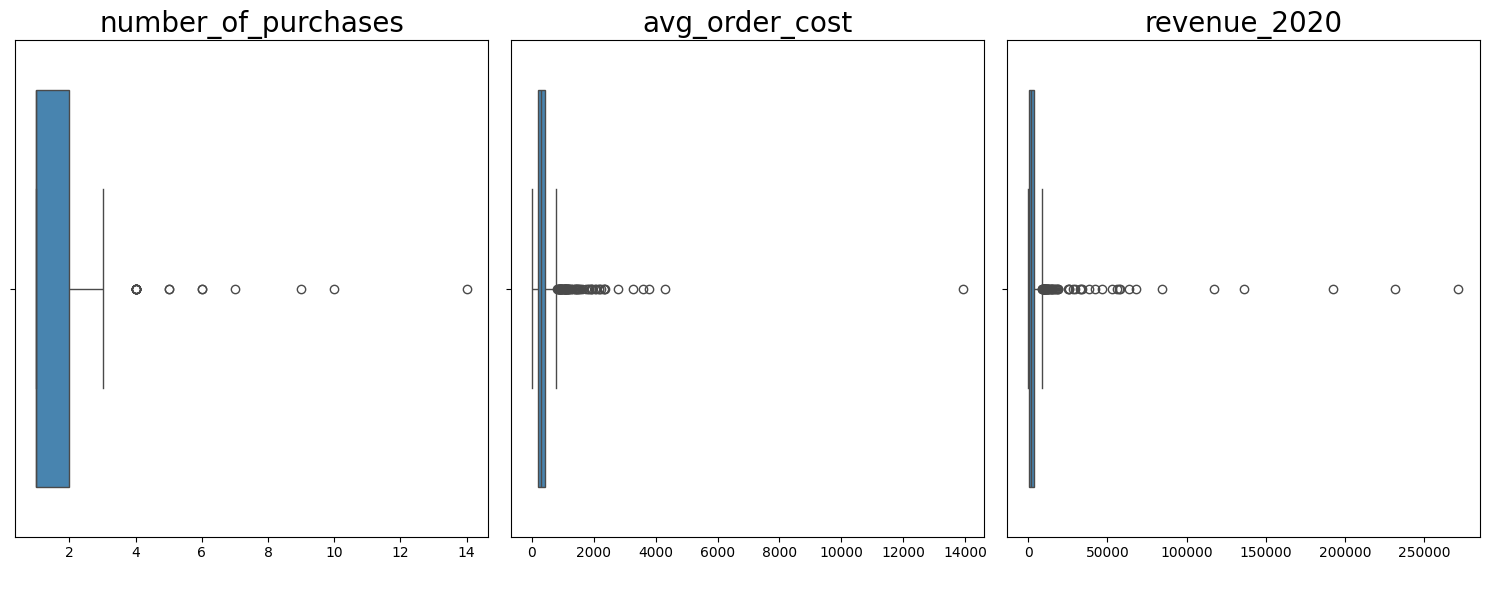

In [66]:
# create boxplot
plt.figure(figsize=(15,6))
for i in range(len(eda_df.columns)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=eda_df[eda_df.columns[i]], palette='Blues_d')
    plt.title(eda_df.columns[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

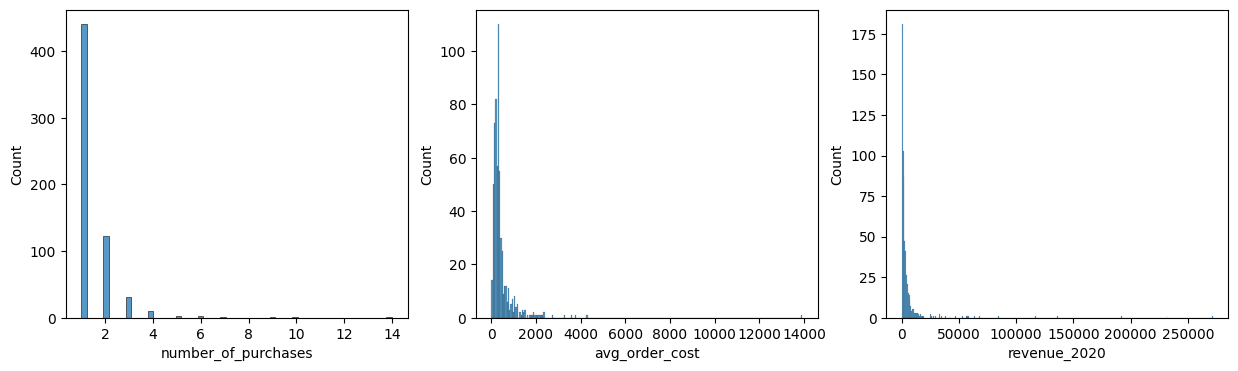

In [67]:
# show the data distribution 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

for i, cols_i in enumerate(eda_df.columns):
    sns.histplot(eda_df[cols_i], ax = ax[i])
    
plt.show()

**Summary of Univariate Analysis**
- we have 2 predictor with outlier and outlier in target variable (revenue_2020)
- The distribution is skew
- There might be some outliers
- we will check the correlation between predictor and target variable to decide whather we need to handle outlier or not

## **4.4 Bivariate Analysis**
---
- We want to check the data distribution using scatterplot

Text(0.5, 1.0, 'number_of_purchases vs revenue_2020')

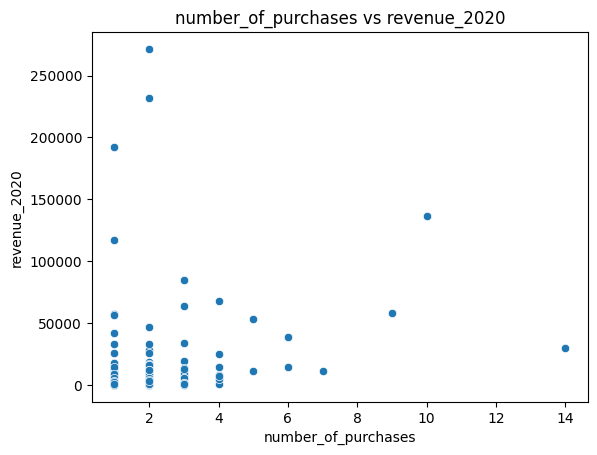

In [68]:
# scatterplot numbers_of_purchases
sns.scatterplot(x='number_of_purchases', y='revenue_2020', data=eda_df)

# title
plt.title('number_of_purchases vs revenue_2020', fontsize=12)

Text(0.5, 1.0, 'avg_order_cost vs revenue_2020')

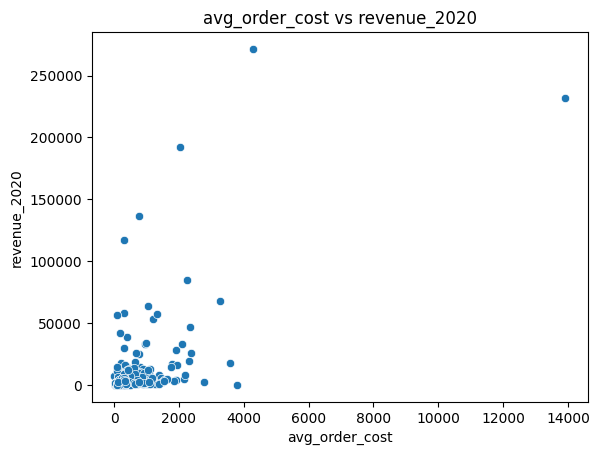

In [69]:
# scatterplot
sns.scatterplot(x='avg_order_cost',
                y='revenue_2020',
                data=eda_df)

# title
plt.title('avg_order_cost vs revenue_2020', fontsize=12)

## **4.5 Correlation Heatmap**
---

In [70]:
# Create Heatmap Correlation Chart for Each Numerical Features
def plot_corr_heatmap(data):
    """
    Function to make correlation heatmap plot

    Parameters
    ----------
    data : <pandas Dataframe>
        Input dataframe

    Returns
    -------
    None
    """
    # Define the figsize
    plt.figure(figsize=(7, 7))

    # Plot correlation heatmap
    sns.heatmap(data.corr(),
                cmap = 'Blues',
                annot = True,
                fmt = '.2f')

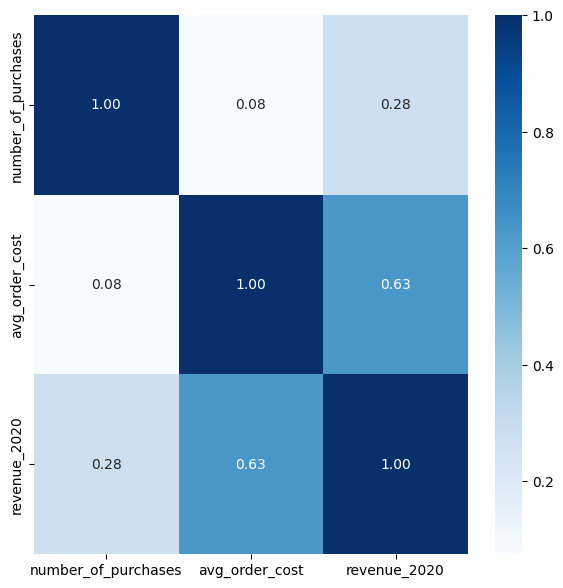

In [71]:
plot_corr_heatmap(eda_df)

**EDA Summary**

- The correlation between average order cost and revenue in 2020 is 65%.
- We will try to cut the outlier.

# <font color='White'>**5. Data Preprocessing**</font>
---
- We only need to handle outliers

In [72]:
# Define training set
train_set = pd.concat([X_train, y_train], axis=1)

In [73]:
train_set.head()

,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,
17567.0,1,517.95,3813.53
12947.0,1,304.04,1299.95
13077.0,1,313.72,415.55
14220.0,1,312.98,319.42
17870.0,1,326.40,1567.95


In [74]:
# create a function to remove outlier
def remove_outlier(data, columns):
    """
    Function to remove outlier

    Parameters
    ----------
    data : pandas Dataframe
        The input data

    col : list
        List of column where the data in this column need
        an outlier removal

    Returns
    -------
    clean_data : pandas Dataframe
        The clean data
    """
    clean_data = data.copy()
    
    for col in columns:
        # find the removal threshold
        Q3 = np.quantile(data[col], 0.75)
        Q1 = np.quantile(data[col], 0.25)
        IQR = Q3 - Q1
        upper_threshold = 1.5 * IQR
        lower_threshold = -1.5 * IQR
        
        # remove the outlier
        clean_data[col] = clean_data[col][(clean_data[col] >= lower_threshold)
                                          & (clean_data[col] <= upper_threshold)]
        
        clean_data = clean_data.dropna()
        
        return clean_data

In [75]:
# remove outliers in train_set
train_set_clean = remove_outlier(data = train_set,
                                 columns = ["avg_order_cost"])

In [76]:
train_set_clean.head()

,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,
12947.0,1,304.04,1299.95
13077.0,1,313.72,415.55
14220.0,1,312.98,319.42
17870.0,1,326.40,1567.95
14744.0,1,225.00,874.98


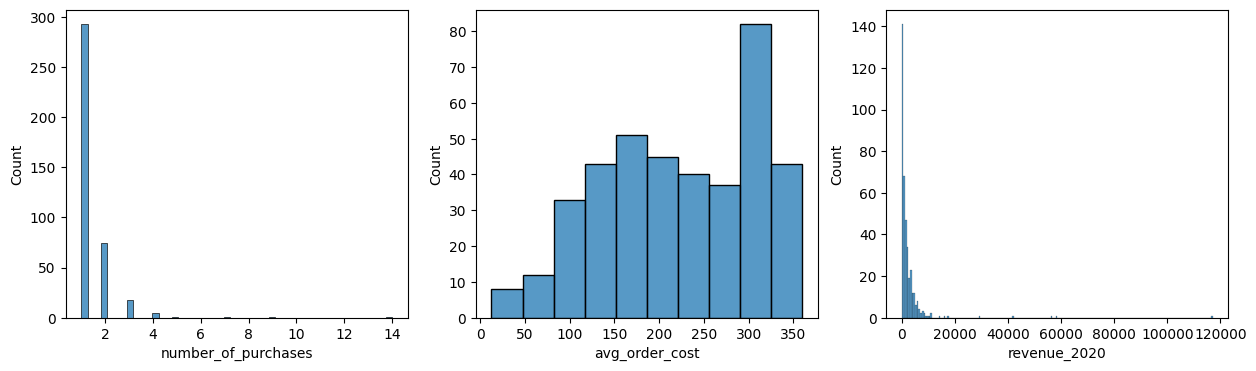

In [77]:
# Show the data distribution
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for i, cols_i in enumerate(train_set_clean.columns):
    sns.histplot(train_set_clean[cols_i],
                 ax = ax[i])

plt.show()

/var/folders/0n/lqrxkmhn4857m0df9f7d0z400000gn/T/ipykernel_2115/1361225618.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set_clean[train_set_clean.columns[i]], palette='Blues_d')
/var/folders/0n/lqrxkmhn4857m0df9f7d0z400000gn/T/ipykernel_2115/1361225618.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set_clean[train_set_clean.columns[i]], palette='Blues_d')
/var/folders/0n/lqrxkmhn4857m0df9f7d0z400000gn/T/ipykernel_2115/1361225618.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set_clean[train_set_clean.

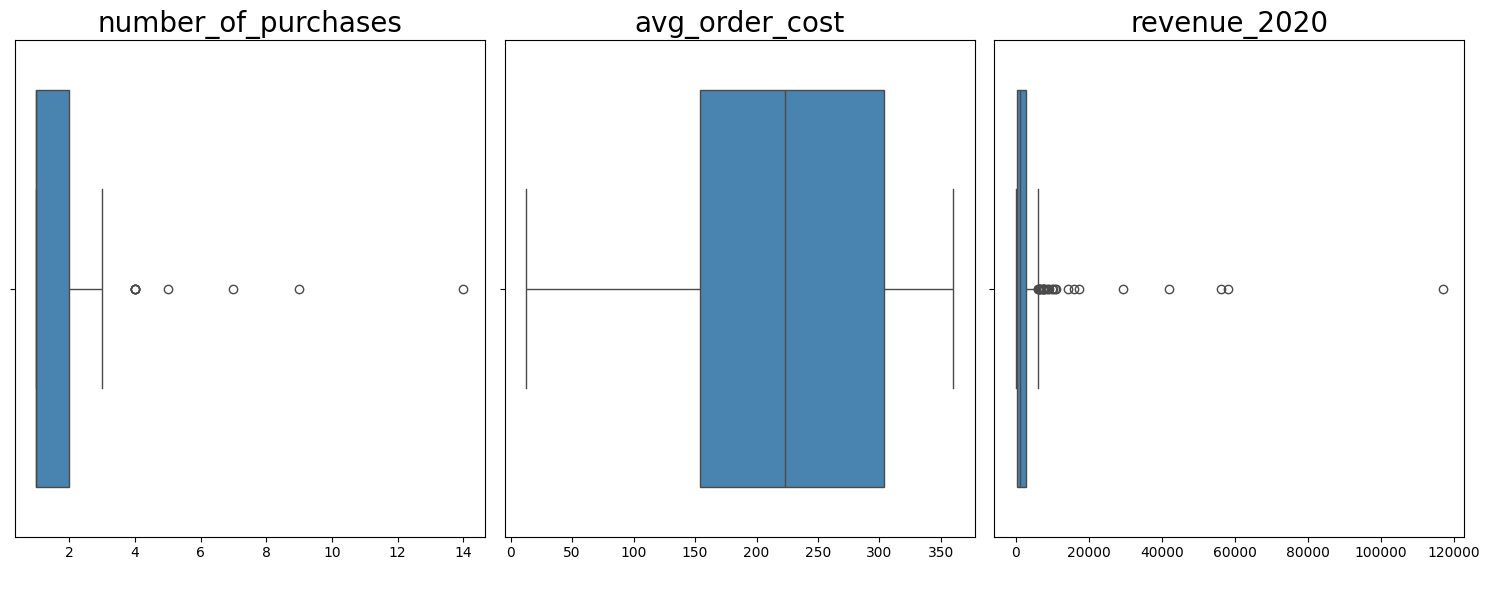

In [80]:
# Show boxplot
plt.figure(figsize=(15,6))
for i in range(len(train_set_clean.columns)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=train_set_clean[train_set_clean.columns[i]], palette='Blues_d')
    plt.title(train_set_clean.columns[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

- The outliers have been removed
- Now we need to split again clean data input and output

Text(0.5, 1.0, 'avg_order_cost vs revenue_2020')

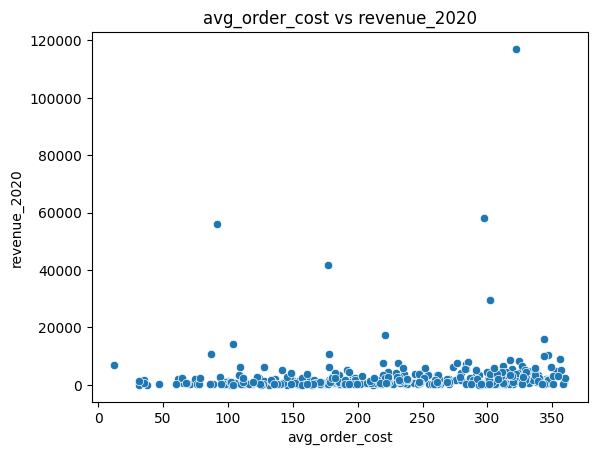

In [81]:
# check scatterplot 
sns.scatterplot(x = 'avg_order_cost',
                y = 'revenue_2020', 
                data = train_set_clean)

# title
plt.title('avg_order_cost vs revenue_2020', fontsize = 12)

Text(0.5, 1.0, 'number_of_purchases vs revenue_2020')

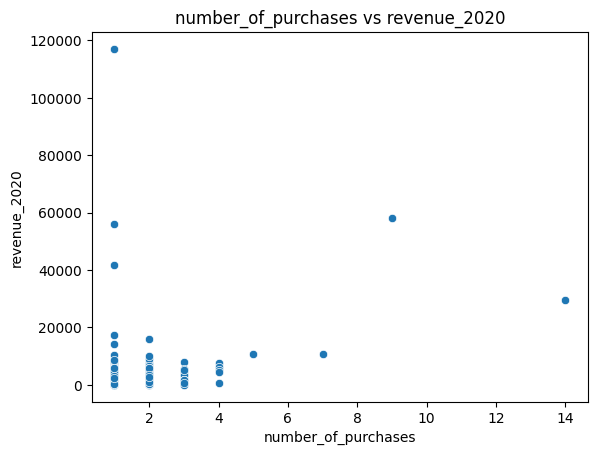

In [82]:
# check scatterplot 
sns.scatterplot(x = 'number_of_purchases',
                y = 'revenue_2020', 
                data = train_set_clean)

# title
plt.title('number_of_purchases vs revenue_2020', fontsize = 12)

In [83]:
# split again the cleaned data
X_train, y_train = split_input_output(data = train_set_clean, 
                                      target_column = "revenue_2020")

# <font color='White'> **6. Modelling**</font>
---
- We will define the baseline model using average of the target variable as 'naive' prediction
- Then we fit the linear regression model
- Make evaluation using RMSE

## **6.1 Baseline Model**
---
- Since our target feature is continuous, we can predict naively by using mean of the target variable
- So, our baseline in this case is the average of revenue_2020

In [84]:
# obtain the baseline prediction
# Baseline prediction of regression is the mean of the target variable
y_pred_baseline = np.mean(y_train)

print(f"Baseline prediction : {y_pred_baseline: .4f}")

Baseline prediction :  2675.8296


## **6.2 Fitting**
---

**Linear Regression**

---
In linear regression, the target value is expected to be a linear combination of the features

$$
\hat{f}(x, w) = w_{0} + w_{1} . x_{1} + w_{2} . x_{2}
$$
<br>

As for our cases, the linear regression would be

$$
\widehat{\text{revenue}}(x,w) = w_{0} + w_{1} . x_{1} + w_{2} . x_{2}
$$

where
- $x_{1}$ : number_of_purchases
- $x_{2}$ : avg_order_cost

**Solving Linear Regression**

---

We solve the linear regression by minimizing the sum of squared error and obtain the optimum weight

$$
w_{\text{optimum}} = \underset{w}{\arg \min} \ ||Xw - y||^{2}_{2}
$$

<br>

It is an [ordinary least square problem](https://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf). We can find $w_{\text{optimum}}$ by solving the normal equation

$$
w_{\text{optimum}} = (X^{T} X)^{-1} X^{T} y
$$

<br>

In this course, we will solve it using the sklearn library

In [85]:
# import library
from sklearn.linear_model import LinearRegression

In [86]:
# Make an Object
lr = LinearRegression()

In [87]:
# Fitting 
lr.fit(X = X_train,
       y = y_train)

LinearRegression()

## **6.3 Evaluation**
---

**Evaluation**
1. Evaluate the performance of the baseline model and the linear regression model on the training data, and compare which model performs better.
2. Evaluate the performance of the baseline model and the linear regression model on the testing data.
3. Select the model with the best performance on the testing data as the final model.
4. Use the testing performance of the final model as a reference for further analysis.

In this part, we will evaluate the model by observing the **RMSE** as the model performance metrics.

In [88]:
# import library
from sklearn.metrics import mean_squared_error

# Create an RSME metrics
def root_mean_squared_error(y_true, y_pred):
    """
    Function to evaluate using RMSE

    Parameters
    ----------
    y_true: <pandas dataframe>
            dataframe ground truth (correct) target values

    y_pred: <pandas dataframe>
            dataframe estimated target values

    Return
    ------
    RMSE: <float>
          The square root of the mean squared error between y_true and y_pred.
    """
    rsme = np.sqrt(mean_squared_error(y_true, y_pred))
    return rsme

In [89]:
# Recall our baseline prediction
print(f"Baseline prediction : {y_pred_baseline}")

Baseline prediction : 2675.8296446700506


In [90]:
# we use baseline model using RMSE metric
rmse_baseline_train = np.sqrt(mean_squared_error(y_true = y_train,
                                                 y_pred = np.ones(len(y_train)) * y_pred_baseline))
# print training baseline RSME
print(f"RMSE baseline on training set : {rmse_baseline_train}")

RMSE baseline on training set : 7744.643527564131


Next, we see how the model perform on the training dataset

In [91]:
# predict the training dataset
y_pred_train = lr.predict(X_train)

In [92]:
# calculate the model performance on training dataset
rmse_train = root_mean_squared_error(y_true = y_train, 
                                     y_pred = y_pred_train)

print(f"RMSE linear regression on training set : {rmse_train:.4f}")

RMSE linear regression on training set : 7355.2230


In [93]:
# Summary, print RMSE in baseline and linear regression model 
print(f"RMSE baseline on training set : {rmse_baseline_train: .4f}")
print(f"RMSE linear regression on training set : {rmse_train:.4f}")

RMSE baseline on training set :  7744.6435
RMSE linear regression on training set : 7355.2230


Our model works better than baseline in training data, we will try to validate using testing data

Next, model performance on testing data
We will choose the best model between baseline & linear regression on the test data (in reality we need validation data to choose the best model)

the most important part, check your model performance in the test dataset, because you want your model to work on **the data that is never seen before**

In [94]:
# Predict the test dataset
y_pred_test = lr.predict(X_test)

In [95]:
# calculate the model performance on test dataset
rmse_test = root_mean_squared_error(y_true = y_test, 
                                     y_pred = y_pred_test)

print(f"RMSE linear regression on test set     : {rmse_test:.4f}")

RMSE linear regression on test set     : 5646.6829


In [96]:
# Summary, print RMSE in baseline and linear regression model in test set
print(f"Baseline RSME : {rmse_baseline_train:.4f}")
print(f"Linear Regression RMSE on training set : {rmse_test:.4f}")

Baseline RSME : 7744.6435
Linear Regression RMSE on training set : 5646.6829


In [97]:
# Summary, print RMSE in baseline and linear regression model
print("TRAINING SET")
print("------------")
print(f"RMSE Baseline          : {rmse_baseline_train:.4f}")
print(f"RMSE Linear Regression : {rmse_train:.4f}")
print(f"RMSE decrease          : {((rmse_baseline_train-rmse_train)/rmse_train)*100:.2f} %")
print("")

# Summary, print RMSE in baseline and linear regression model in test set
print("TESTING SET")
print("------------")
print(f"RMSE Baseline          : {rmse_baseline_train:.4f}")
print(f"RMSE Linear Regression : {rmse_test:.4f}")
print(f"RMSE decrease          : {((rmse_baseline_train-rmse_test)/rmse_test)*100:.2f} %")

TRAINING SET
------------
RMSE Baseline          : 7744.6435
RMSE Linear Regression : 7355.2230
RMSE decrease          : 5.29 %

TESTING SET
------------
RMSE Baseline          : 7744.6435
RMSE Linear Regression : 5646.6829
RMSE decrease          : 37.15 %


- The model performs better than the baseline model in terms of prediction accuracy, as it has a lower average prediction error.
- We can choose linear regression model as our choosen model
- The comparison suggests that the  model performs better than the baseline model. It has reduced the average prediction error from $\$7744.6435$ to $\$5646.68$ (or about 30.30% decrease in RMSE)

# <font color='White'>**6. Interpretation**</font>
---

In [106]:
import pandas as pd

def get_coef_df(X, lr):
    """
    Function to get linear regression coefficients in dataframe format

    Parameters
    ----------
    X:  <pandas dataframe>
        The input features

    lr: <LinearRegression object>
        A fitted instance of the LinearRegression class from scikit-learn.

    Return
    ------

    coef_df:  <pandas dataframe>
              A DataFrame with two columns: "Feature" and "Coefficient".
    """
    coef_df = pd.DataFrame({
        # get feature name
        "Feature": X.columns,
        # get coefficient (slope)
        "Coefficient": lr.coef_
    })
    # append coefficient (intercept)
    coef_df = coef_df._append({"Feature": "Intercept", "Coefficient": lr.intercept_}, ignore_index=True)
    
    return coef_df


In [107]:
get_coef_df(X_train, lr)

,Feature,Coefficient
0,number_of_purchases,2216.321029
1,avg_order_cost,9.658117
2,Intercept,-2562.088467


**Coefficients Interpretation**
----

$$
\text{revenue_2020} = - 2562 + 2216.32 \cdot \text{number_of_purchases} + 9.6581\cdot \text{avg_order_cost}
$$

<br>

- For every 1 unit increase in the number of purchases (number_of_purchases), we expect a 2216.32 dollar increase in revenue in 2020 (revenue_2020), holding all other features constant.
- Marketing innitiative: Increase number_of_purchases by running cross-selling or discount promotion campaign<br>
<br>

- For every 1 dollar increase in the average order cost (avg_order_cost), we expect a 9.6581 dollar increase in revenue in 2020 (revenue_2020), holding all other features constant.
- Marketing innitiative: We can implement upselling promotion to increase the average_order_cost

<br>
<br>

- The intercept value (-2562) represents the expected revenue in 2020 (revenue_2020) when all the other independent variables are held constant at 0.
- When there's no avg_order cost and number_of_purchases is equal to 0, the expected revenue is -2,562
- It means if we do nothing, the company will get negative revenue (loss)
- We should implement marketing treatment/innitiative in order to make revenue <br>

# <font color='white'>**7. Analysis**</font>
---
- We want to implement Percentile Analysis to know which customer we should give special treatment
- Define existing average revenue and target average revenue
- Business Simulation



## **7.1 Percentile Analysis**
---
- We want to analyze using percentile

In [108]:
# print percentile analysis
pd.DataFrame(y_pred_test).describe(percentiles=[.05, .1, .2, .25, .3, .4, .5, .75])

,0
count,154.000000
mean,4507.894227
std,5543.821150
min,-189.209357
5%,603.190874
10%,758.261605
20%,1258.523105
25%,1577.984650
30%,1759.798708
40%,2442.994607


`Business Question`
- How can Azra develop unique marketing strategy to increase 50% average order revenue (revenue per customer)?

`Solution`
- Azra can implement **loyalty based promotion/campaign and upselling strategy** to keep top 75%-100% predicted sales percentile customers --> `Focus retain high value customers`
- Azra can implement **cross selling strategy** to retail 25%-75% customers percentile
- Azra can implement **discount offering / coupon code** promotion for top 5-25% predicted sales percentile customers

## **7.2 Existing And Target Average Revenue**
- We should define the existing average  revenue (revenue per customer) from the mean of y_pred
- We want to simulate whether our marketing strategy implementation works well to increase 50% of average order value

In [109]:
# Existing Average Revenue
print(f"Existing average revenue : {df['revenue_2020'].mean():.2f}")

# Target Average Revenue
print(f"Target average revenue : {df['revenue_2020'].mean()*1.5:.2f}")

Existing average revenue : 5142.86
Target average revenue : 7714.30


## **7.3 Simulation**
- We want to make sure whether our marketing strategy can increase 50% of the average revenue or not
- To achieve the 50% increase of average revenue, we want to conduct simulation of how many increase needed in predictor to increase 50% of average revenue?

In [114]:
# read full data for simulation
path = '/Users/adam/Documents/Projects/PACMANN/Cust-Market-Anaylitc/data/raw/azra_retail_dataset.csv'
data = read_data(path)

# set customerID as index
data.set_index('CustomerID', inplace=True)

In [115]:
# show data
data.head()

,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,
12347.0,1,711.79,3598.21
12348.0,1,892.80,904.44
12370.0,2,934.01,1677.67
12377.0,1,1001.52,626.60
12383.0,1,600.72,1249.84


In [116]:
def simulate_revenue_increase(df, predictors, predictor_variable, model):
    """
    Simulate the increase in revenue by increasing every 5% of avg_order_cost and plot the results.

    Parameters:
    -----------
    df : <pandas.DataFrame>
         A DataFrame containing the predictors and target variable (revenue).

    predictors : <list>
                 A list of strings representing the names of the predictors.

    predictor_variable : <str>
                         The name of the predictor variable to be used in the simulation.

    model : <sklearn model>
            A trained sklearn model.

    Returns:
    --------
    avg_rev_df : <pandas.DataFrame>
                 A DataFrame of the average revenue vs the avg_order_cost increase.

    plot : <matplotlib.pyplot.plot>
           A plot of the average revenue vs the avg_order_cost increase.
    """

    # Create Improvement Experiments
    experiments = np.arange(-1, 1.05, 0.05)
    experiments[20] = 0
    avg_rev_list = []

    for i in experiments:
        # Create simulation data
        df_simulation = df.copy()
        df_simulation[predictor_variable] = df_simulation[predictor_variable] * (1 + i)

        # Predict Simulation Values
        X_sim = df_simulation[predictors]
        y_sim_pred = model.predict(X_sim)

        # Calculate Simulation Average Revenue
        avg_rev = y_sim_pred.mean()
        avg_rev_list.append(avg_rev)

    # Create DataFrame of Results
    avg_rev_df = pd.DataFrame({'Avg Order Cost Increase (%)': experiments, 'Average Revenue': avg_rev_list})

    # Create Plot
    fig, ax = plt.subplots()
    ax.plot(experiments, avg_rev_list, marker='o', linewidth=1)
    ax.set_ylabel('Average Revenue')
    ax.set_xlabel('Avg Order Cost Increase (%)')
    ax.set_title('Average Revenue vs Avg Order Cost Increase')
    ax.axvline(linewidth=1, color='r', label='Current Condition')
    ax.legend()

    return avg_rev_df, fig

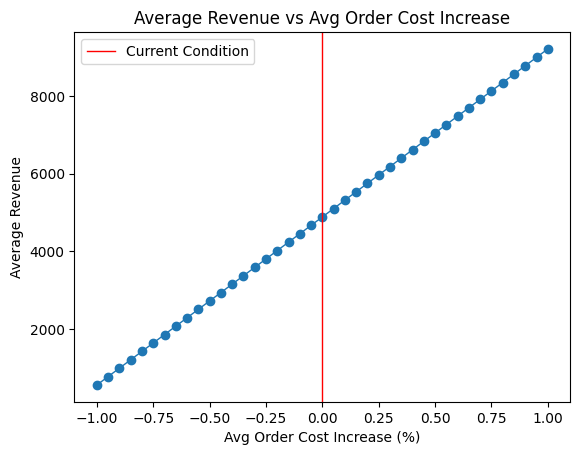

In [117]:
# plot figure
avg_rev_df, fig = simulate_revenue_increase(df = data,
                                            predictors = ['number_of_purchases', 'avg_order_cost'],
                                            predictor_variable = 'avg_order_cost',
                                            model = lr)

In [118]:
# show df
avg_rev_df.head(50)

,Avg Order Cost Increase (%),Average Revenue
0,-1.00,565.643952
1,-0.95,781.686979
2,-0.90,997.730006
3,-0.85,1213.773033
4,-0.80,1429.816061
5,-0.75,1645.859088
6,-0.70,1861.902115
7,-0.65,2077.945143
8,-0.60,2293.988170
9,-0.55,2510.031197


**Simulation Result**
- We can achieve 50% increase in revenue_2020 by increasing avg_order_cost up to 70%%
- We can increase the avg_order_cost by implementing the marketing recommendation above

So, with the implementation of marketing strategy, with simple simulation, we need an increase of avg_customer_cost by 70% to increase revenue_2020 up to 50%